<a href="https://colab.research.google.com/github/Gaoshan-Pan/Final_work/blob/main/Customer_Segmentation_and_a_new_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning


In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# version 2
import kagglehub
rohitsahoo_sales_forecasting_path = kagglehub.dataset_download('rohitsahoo/sales-forecasting')

print('Data source import complete.')


Data source import complete.


In [3]:
# Importing dataset
superstore = pd.read_csv('/kaggle/input/sales-forecasting/train.csv', parse_dates = ['Order Date'])
superstore.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [4]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
print(f"Amount of unique value within 'Row ID' feature is {superstore['Row ID'].nunique()}")

Amount of unique value within 'Row ID' feature is 9800


# 2.2. Order ID, Order Date, Ship Date

change the data types of 'Order Date' and 'Ship Date' features into datetime object.

In [6]:
# Changing type of 'Order Date' and 'Ship Date' features into datetime object
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'], dayfirst = True)
superstore['Ship Date'] = pd.to_datetime(superstore['Ship Date'], dayfirst = True)

In [7]:
# Looking for starting and ending transaction date of the dataset
from datetime import datetime
min_date = superstore['Order Date'].min()
max_date = superstore['Order Date'].max()

print(f"Start date of transactions is {datetime.strftime(min_date, '%d %B %Y')} and the most recent one is {datetime.strftime(max_date, '%d %B %Y')}")

Start date of transactions is 03 January 2015 and the most recent one is 30 December 2018


In [8]:
# Looking for transactions having one 'Order ID' with more than one 'Order Date'
amount_order = len(superstore.groupby('Order ID'))
order_multi_date = superstore.groupby('Order ID')['Order Date'].nunique() > 1

print(f"Amount of orders based on Order ID is {amount_order}")
print(f"Amount of transactions which has one Order ID with more than one Order Date is {order_multi_date.sum()}")

Amount of orders based on Order ID is 4922
Amount of transactions which has one Order ID with more than one Order Date is 0


# 1. Preparation

In [9]:
# ── Missing Value Summary ────────────────────────────────────────────────

# Total number of missing values
total_na = superstore.isna().sum().sum()

# Missing values per column, sorted descending
missing_by_column = superstore.isna().sum().sort_values(ascending=False)

print(f"Total missing values in the DataFrame: {total_na}\n")
print("Missing values by column:")

# Use display() in Jupyter notebooks for better output formatting
display(missing_by_column)


Total missing values in the DataFrame: 11

Missing values by column:


,0
Postal Code,11
Row ID,0
Order ID,0
Order Date,0
Ship Mode,0
Ship Date,0
Customer Name,0
Segment,0
Country,0
Customer ID,0


In [10]:
superstore = superstore.dropna(subset=["Postal Code"])
superstore.shape

(9789, 18)

## drop those cols we not using rn

In [11]:
superstore.drop(columns = ['Row ID', 'Ship Date', 'City', 'State', 'Postal Code', 'Region'], axis = 1, inplace = True,  errors='ignore')
superstore.head(2)

<ipython-input-11-aa2719a18028>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superstore.drop(columns = ['Row ID', 'Ship Date', 'City', 'State', 'Postal Code', 'Region'], axis = 1, inplace = True,  errors='ignore')


,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-11-08,Second Class,CG-12520,Claire Gute,Consumer,United States,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,CA-2017-152156,2017-11-08,Second Class,CG-12520,Claire Gute,Consumer,United States,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [12]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9789 non-null   object        
 1   Order Date     9789 non-null   datetime64[ns]
 2   Ship Mode      9789 non-null   object        
 3   Customer ID    9789 non-null   object        
 4   Customer Name  9789 non-null   object        
 5   Segment        9789 non-null   object        
 6   Country        9789 non-null   object        
 7   Product ID     9789 non-null   object        
 8   Category       9789 non-null   object        
 9   Sub-Category   9789 non-null   object        
 10  Product Name   9789 non-null   object        
 11  Sales          9789 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 994.2+ KB


In [13]:
print(f"Amount of customers doing transactions between {min_date.year} - {max_date.year} is {superstore['Customer ID'].nunique()}")
print(f"Amount of transactions done between {min_date.year} - {max_date.year} is {superstore['Order ID'].nunique()}")

Amount of customers doing transactions between 2015 - 2018 is 793
Amount of transactions done between 2015 - 2018 is 4916


In [14]:
superstore.sort_values(by=['Order Date'], inplace=True)
superstore.head(3)

,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,Product ID,Category,Sub-Category,Product Name,Sales
7980,CA-2015-103800,2015-01-03,Standard Class,DP-13000,Darren Powers,Consumer,United States,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
741,CA-2015-112326,2015-01-04,Standard Class,PO-19195,Phillina Ober,Home Office,United States,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540
740,CA-2015-112326,2015-01-04,Standard Class,PO-19195,Phillina Ober,Home Office,United States,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736


In [15]:
superstore.tail(3)

,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,Product ID,Category,Sub-Category,Product Name,Sales
907,CA-2018-143259,2018-12-30,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930
1296,CA-2018-115427,2018-12-30,Standard Class,EB-13975,Erica Bern,Corporate,United States,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904
5091,CA-2018-156720,2018-12-30,Standard Class,JM-15580,Jill Matthias,Consumer,United States,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024


# 2. Preprocessing

The timeframe of the data is 2015-01-03 to 2018-12-30
- Recency (R): how recent a specific customer made his/her latest purchase. For this case, since latest transaction date is 30 December 2018, I will set 2018.12.31 as threshold to calculate recency.
- Frequency (F): how many transactions a specific customer has done since 2015 until 2018.
- Monetary (M): how much money a specific customer has spent since 2015 until 2018.

In [52]:
# Making dataframe RFM
data_rfm = list()

for name in superstore['Customer Name'].unique():
    data_rfm.append([name,
                     ## Recency
                     (datetime(2018, 12, 31).date() - superstore[superstore['Customer Name'] == name]['Order Date'].max().date()).days,
                     ## Inverted Recency
                     (superstore[superstore['Customer Name'] == name]['Order Date'].max().date() - datetime(2015, 1, 2).date()).days,
                     ## Frequency
                     superstore[superstore['Customer Name'] == name]['Order ID'].nunique(),
                     ## Monetary
                     round(superstore[superstore['Customer Name'] == name]['Sales'].sum(), 2)])

df_rfm = pd.DataFrame(data_rfm, columns = ['Customer Name', 'Recency', 'Inverse_Recency','Frequency',
                                           'Monetary']).sort_values('Customer Name')

df_rfm.reset_index(drop = True, inplace = True)
df_rfm.head()

,Customer Name,Recency,Inverse_Recency,Frequency,Monetary
0,Aaron Bergman,416,1043,3,886.16
1,Aaron Hawkins,13,1446,7,1744.70
2,Aaron Smayling,89,1370,7,3050.69
3,Adam Bellavance,55,1404,8,7755.62
4,Adam Hart,35,1424,10,3250.34


In [17]:
df_rfm.describe()

,Recency,Inverse_Recency,Frequency,Monetary
count,793.000000,793.000000,793.000000,793.000000
mean,149.809584,1309.190416,6.199243,2840.614666
std,187.449846,187.449846,2.522254,2618.950540
min,1.000000,293.000000,1.000000,4.830000
25%,31.000000,1274.000000,4.000000,1080.750000
50%,77.000000,1382.000000,6.000000,2203.780000
75%,185.000000,1428.000000,8.000000,3644.980000
max,1166.000000,1458.000000,17.000000,25043.050000


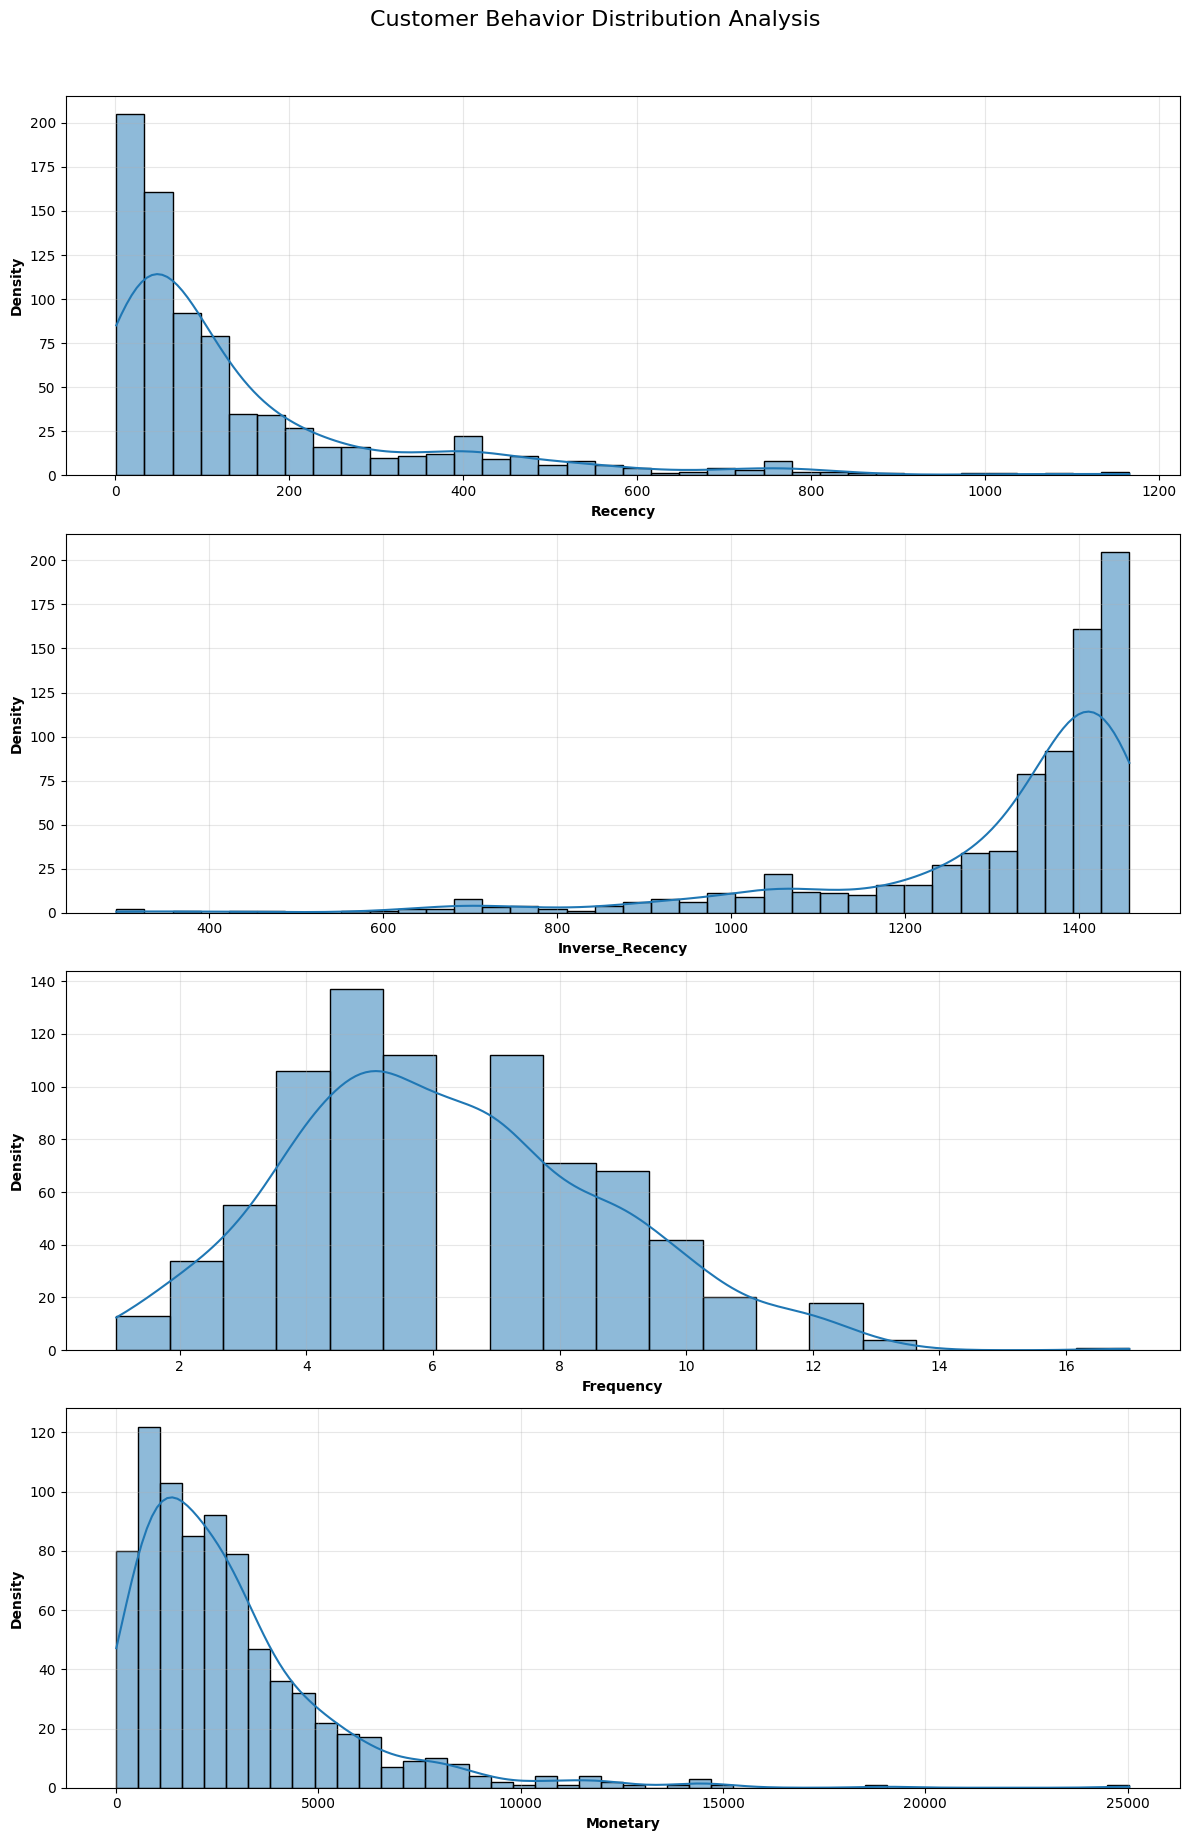

In [18]:
# Visualizing RFM distributions with enhanced presentation
plt.figure(figsize=(12, 18))
axes = plt.subplot(4, 1, 1)

for i, column in enumerate(df_rfm.columns[1:]):  # Skip Customer Name
    plt.subplot(4, 1, i+1)
    sns.histplot(df_rfm[column], kde=True)
    plt.xlabel(column, fontweight='bold')
    plt.ylabel('Density', fontweight='bold')
    plt.grid(alpha=0.3)

plt.suptitle('Customer Behavior Distribution Analysis', y=1.02, fontsize=16)
plt.tight_layout()

Because we are applying a clustering algorithm, it is a good idea to scale the features to have comparable influence for all the variables. RFM analysis conventionally splits the data into quintiles (5 equal-sized bins) and then assigns scores of 1 to 5. In this solution, I will standardize the data (e.g., Z-score normalization) instead of quintile-based scoring.

One of the problems is that there is an inherent difference between the interpretation of Recency and that of Frequency and Monetary. While for Frequency and Monetary, the higher the score, the better (more purchases and higher spending), for Recency, the lower the score, the better (indicating more recent activity on the customers' part). To balance this, I will adjust the scaling procedure as required—for example, by inverting Recency values before standardizing or using a directional transformation to render its interpretation in the same direction as the other metrics

In [19]:
# Call for a scaler model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
# data transformation
scaled_data = scaler.fit_transform(df_rfm.drop(['Customer Name', 'Recency'], axis = 1))

In [21]:
# Stitches a dataframe having actual data and scaled data
df_rfm_new = pd.concat([df_rfm, pd.DataFrame(scaled_data, index = df_rfm.index,
                                             columns = ['Recency_Scale', 'Frequency_Scale', 'Monetary_Scale'])],
                       axis = 1)

df_rfm_new.head()

,Customer Name,Recency,Inverse_Recency,Frequency,Monetary,Recency_Scale,Frequency_Scale,Monetary_Scale
0,Aaron Bergman,416,1043,3,886.16,-1.420958,-1.269207,-0.746745
1,Aaron Hawkins,13,1446,7,1744.70,0.730307,0.317677,-0.418720
2,Aaron Smayling,89,1370,7,3050.69,0.324609,0.317677,0.080264
3,Adam Bellavance,55,1404,8,7755.62,0.506106,0.714398,1.877892
4,Adam Hart,35,1424,10,3250.34,0.612868,1.507840,0.156545


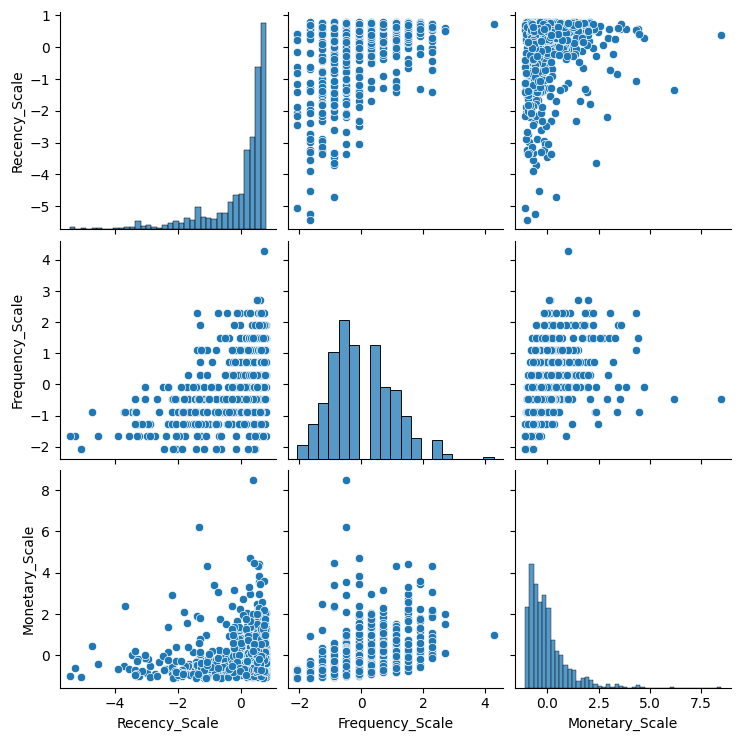

In [22]:
# Visualization of scaled values
sns.pairplot(df_rfm_new[['Recency_Scale', 'Frequency_Scale', 'Monetary_Scale']])

Because the three RFM dimensions are also pre-scaled (z-scored) (center ≈ 0, σ ≈ 1), any point with scaled value |z| > 3 is by definition more than three standard-deviations from the mean—statistically rare (< 0.3 % in a normal distribution).
In view of the pair-plot:

Recency_Scale – a very thin tail on the left goes down to –4 … –5 ⇒ customers not purchasing for unusually extended durations.

Frequency_Scale – some points to the right around ≈ +4 ⇒ "hyper-active" consumers.

Monetary_Scale – one or two dots at +8 ⇒ extremely high spenders.

Those dots lie far out of the mass of the point cloud and can draw Euclidean-distance founded clustering (e.g., K-Means) off-centre.

In [23]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

rfm_scaled = df_rfm_new[['Recency_Scale','Frequency_Scale','Monetary_Scale']]

# 1-D z-score rule (fast, transparent)
outlier_mask = (np.abs(rfm_scaled) > 3).any(axis=1)
outliers      = df_rfm_new[outlier_mask]        # inspect or log
clean_sample  = df_rfm_new[~outlier_mask]       # use for K-Means

# OR: multivariate (Mahalanobis) for coupled extremes
from scipy.spatial.distance import mahalanobis
VI = np.linalg.inv(np.cov(rfm_scaled.T))
m_dist = rfm_scaled.apply(lambda r: mahalanobis(r, rfm_scaled.mean(), VI), axis=1)
chi_cut = np.sqrt(  # 99.7 % quantile for χ² with 3 d.o.f.
    3 * (np.percentile(m_dist**2, 99.7))
)
multivar_mask = m_dist > chi_cut

In [24]:
# `outlier_mask`  was created in the previous snippet
n_out = outlier_mask.sum()
print(f"{n_out} customers flagged ({n_out/len(df_rfm_new):.2%} of total)")

39 customers flagged (4.92% of total)


In [25]:
# 1-a  Quick preview
df_rfm_new[outlier_mask].head()

,Customer Name,Recency,Inverse_Recency,Frequency,Monetary,Recency_Scale,Frequency_Scale,Monetary_Scale
6,Adrian Barton,42,1417,10,14473.57,0.575501,1.507840,4.444642
34,Andy Gerbode,845,614,4,1455.04,-3.711015,-0.872486,-0.529391
75,Becky Martin,308,1151,4,11789.63,-0.844441,-0.872486,3.419180
132,Caroline Jumper,190,1269,8,11164.97,-0.214542,0.714398,3.180514
156,Christopher Conant,44,1415,5,12129.07,0.564825,-0.475765,3.548871


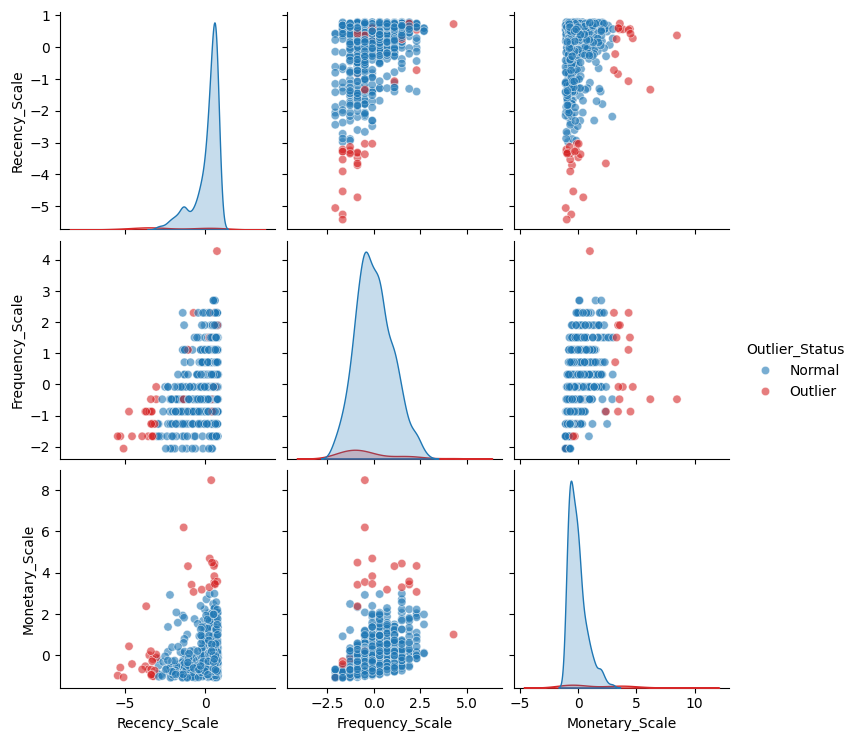

In [26]:
# import seaborn as sns
# sns.pairplot(df_rfm_new, vars=['Recency_Scale','Frequency_Scale','Monetary_Scale'],
#              hue=outlier_mask.map({True: 'Outlier', False: 'Normal'}),
#              palette={'Normal':'#1f77b4', 'Outlier':'#d62728'}, plot_kws=dict(alpha=.6))

# Add the outlier status as a new column in the DataFrame
df_rfm_new['Outlier_Status'] = outlier_mask.map({True: 'Outlier', False: 'Normal'})

# Plotting the pairplot using the new column for hue
sns.pairplot(df_rfm_new, vars=['Recency_Scale','Frequency_Scale','Monetary_Scale'],
             hue='Outlier_Status',  # Use the new column name as the hue
             palette={'Normal':'#1f77b4', 'Outlier':'#d62728'}, plot_kws=dict(alpha=.6))

# Optionally, you can drop the 'Outlier_Status' column later if not needed
# df_rfm_new.drop(columns=['Outlier_Status'], inplace=True)

In [27]:
# Dropping 'Inverse_Recency' feature
df_rfm_new.drop('Inverse_Recency', axis = 1, inplace = True)
df_rfm_new.reset_index(drop = True, inplace = True)

# 3. Clustering

## 3.1. Clustering (Non-PCA)

### 3.1.1. K-means Clustering

In [28]:
# Importing libraries
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

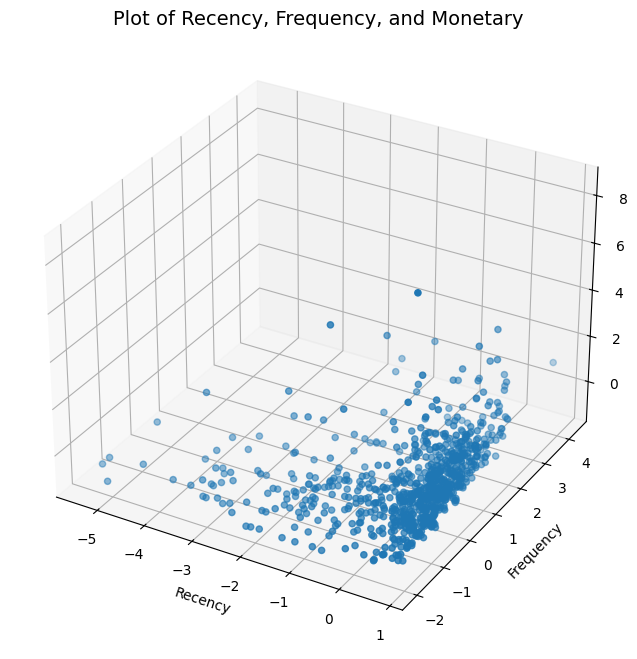

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D scattered plot
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')  #

ax.scatter(
    xs=df_rfm_new['Recency_Scale'],
    ys=df_rfm_new['Frequency_Scale'],
    zs=df_rfm_new['Monetary_Scale']
)

ax.set_title('Plot of Recency, Frequency, and Monetary', fontsize=14)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

Text(0, 0.5, 'Inertia')

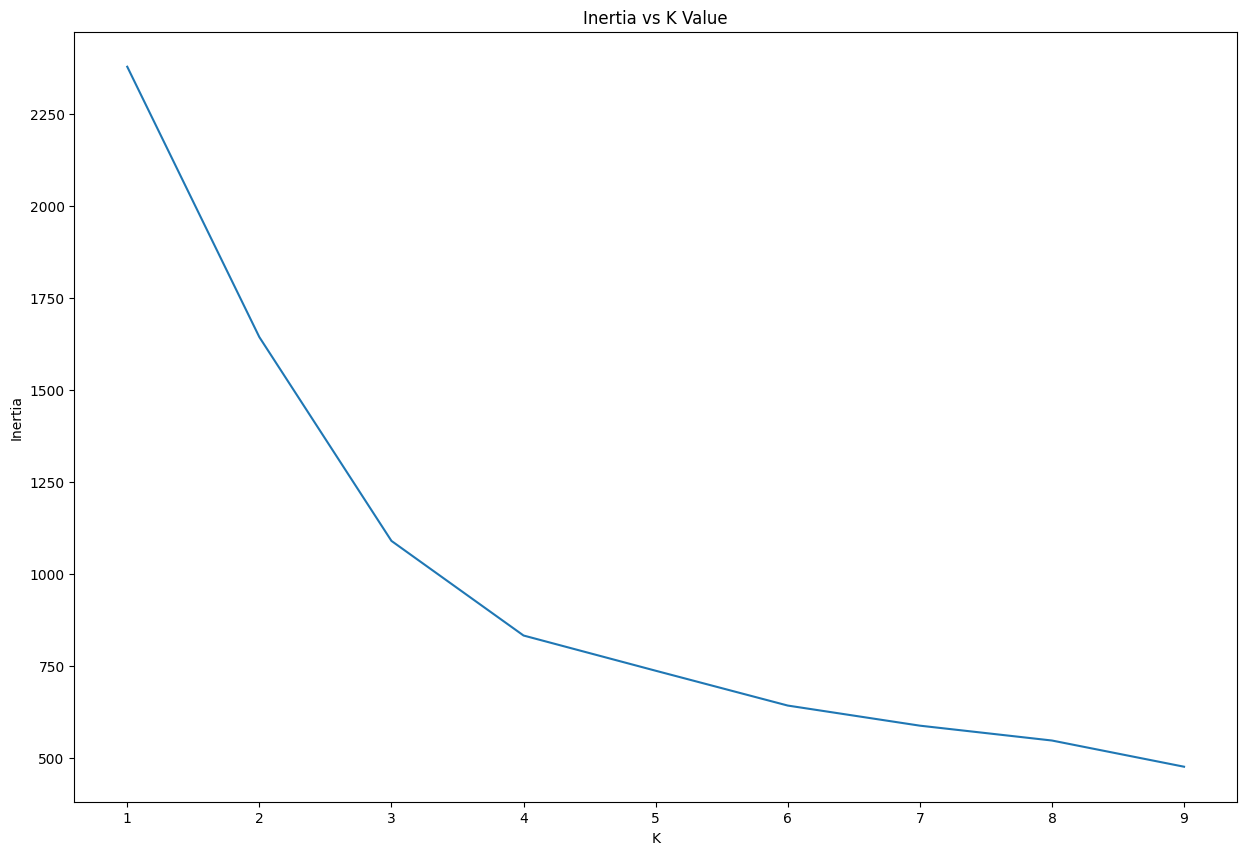

In [30]:
# Elbow method to determine number of k
inertia_list = list()

for i in range(1, 10):
    km = KMeans(n_clusters = i)
    km.fit(df_rfm_new[['Recency_Scale', 'Frequency_Scale', 'Monetary_Scale']])
    inertia_list.append(km.inertia_)

plt.figure(figsize = (15, 10))
# plt.plot(range(1, 10), inertia_list, color = 'blue', linestyle = 'dashed',
#          marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.plot(range(1, 10), inertia_list)
plt.title('Inertia vs K Value')
plt.xticks(range(1, 10))
plt.xlabel('K')
plt.ylabel('Inertia')

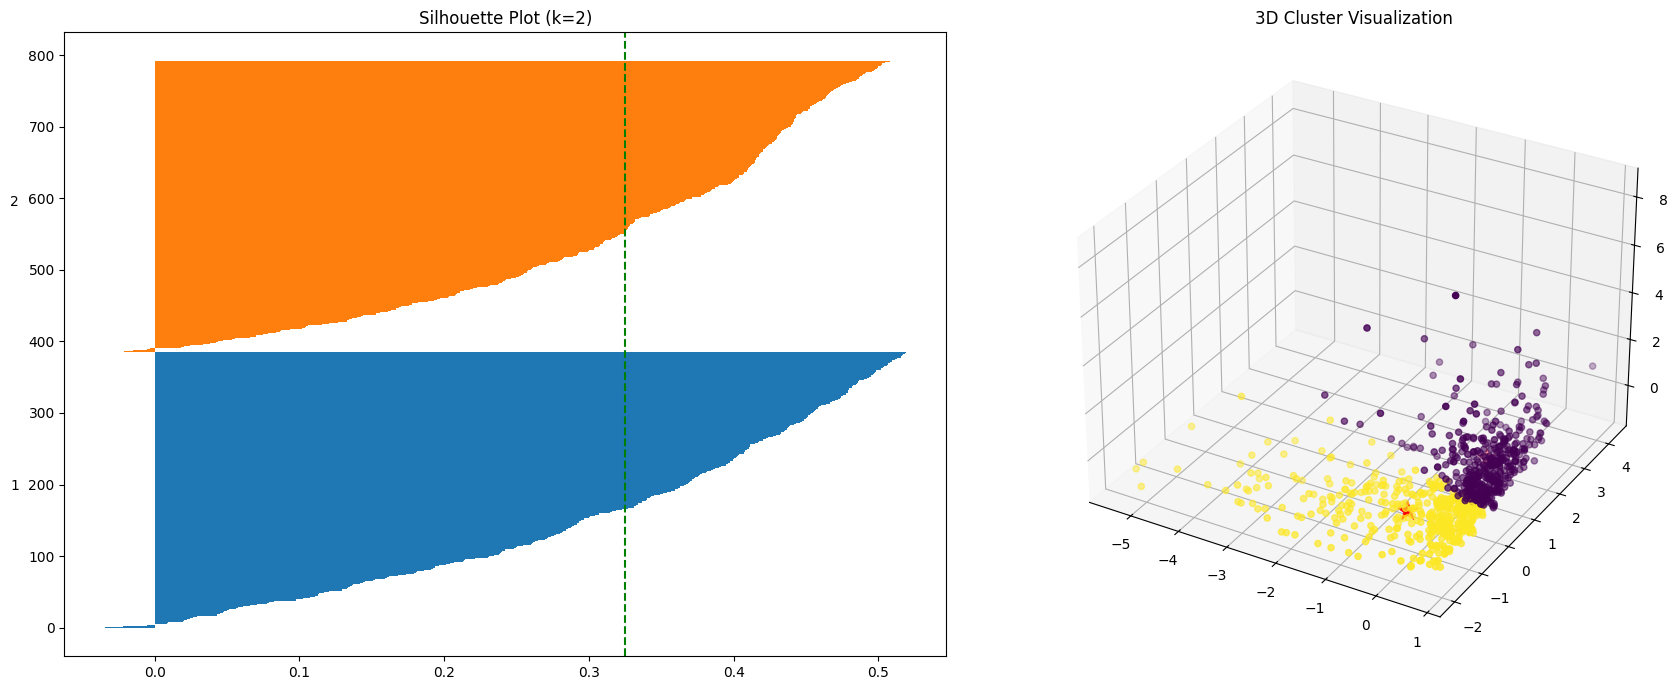


K=2 Result:
Average Silhouette Score: 0.3250


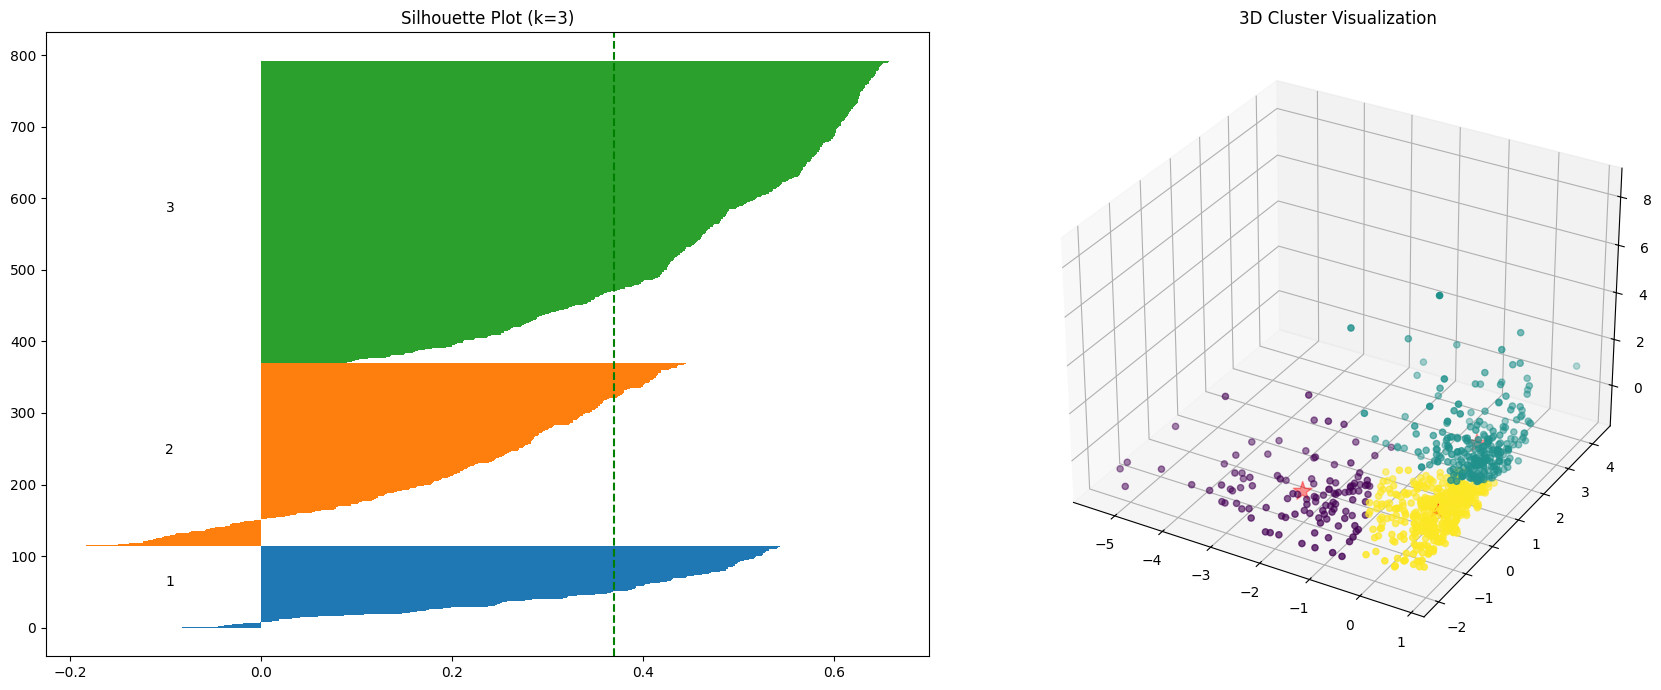


K=3 Result:
Average Silhouette Score: 0.3700


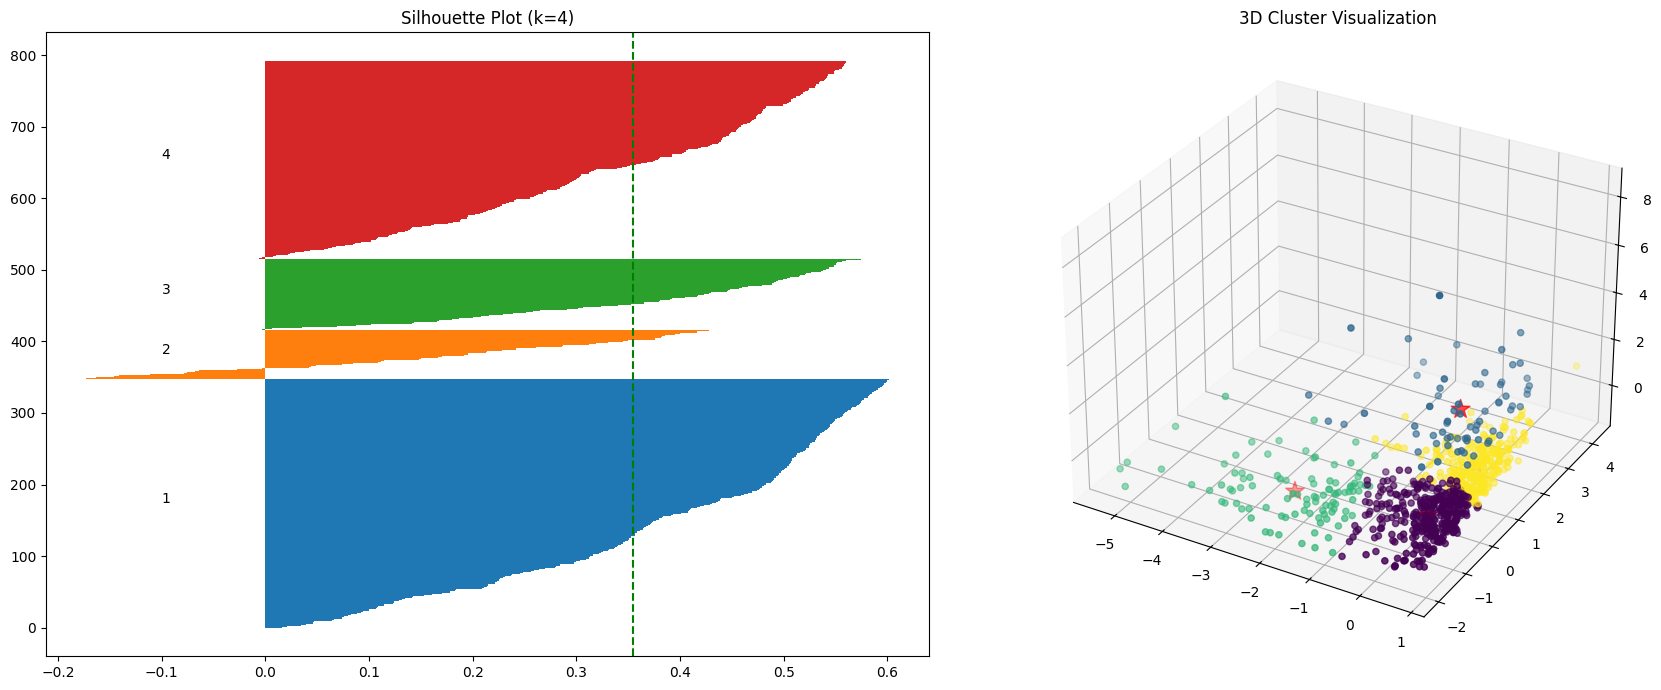


K=4 Result:
Average Silhouette Score: 0.3543


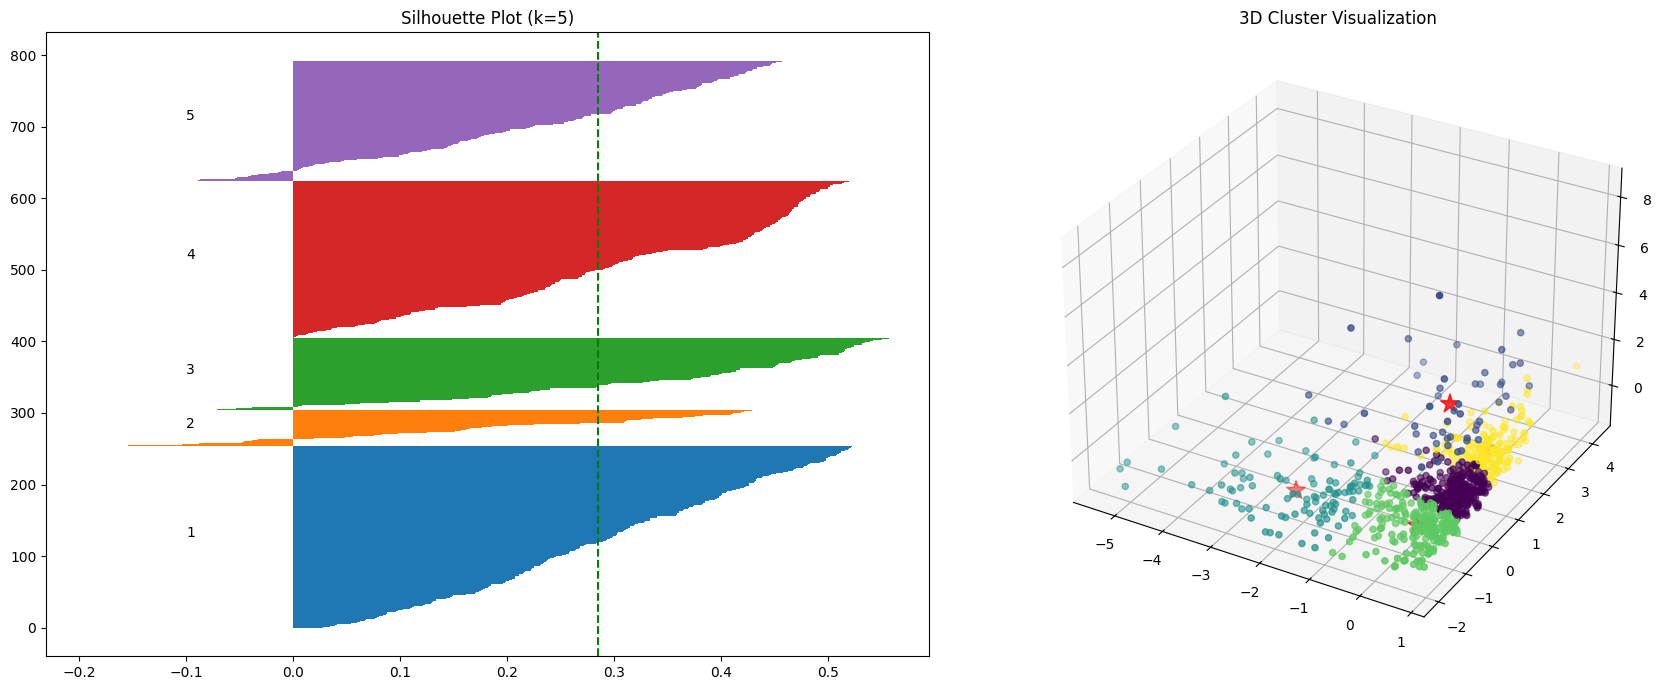


K=5 Result:
Average Silhouette Score: 0.2846


In [31]:
from sklearn.metrics import silhouette_score, silhouette_samples # Add silhouette_samples to the import statement
from time import time

def optimized_silhouette_analysis(df_rfm_new, max_k=5):
    features = ['Recency_Scale', 'Frequency_Scale', 'Monetary_Scale']
    X = df_rfm_new[features].values

    for k in range(2, max_k+1):
        start_time = time()

        # 创建画布
        fig = plt.figure(figsize=(18, 7))
        ax1 = fig.add_subplot(121)
        ax2 = fig.add_subplot(122, projection='3d')

        # 高效K-means聚类
        km = KMeans(n_clusters=k, init='k-means++', n_init=10)
        labels = km.fit_predict(X)
        centroids = km.cluster_centers_

        # 计算轮廓系数（批量处理）
        silhouette_vals = silhouette_samples(X, labels)
        avg_score = np.mean(silhouette_vals)

        # 绘制轮廓图
        y_lower = 0
        for i in range(k):
            cluster_vals = silhouette_vals[labels == i]
            cluster_vals.sort()
            y_upper = y_lower + len(cluster_vals)
            ax1.barh(range(y_lower, y_upper), cluster_vals, height=1)
            ax1.text(-0.1, (y_lower + y_upper)/2, str(i+1))
            y_lower = y_upper

        ax1.axvline(avg_score, linestyle='--', color='green')
        ax1.set_title(f'Silhouette Plot (k={k})')

        # 绘制3D散点图
        ax2.scatter(X[:,0], X[:,1], X[:,2], c=labels)
        ax2.scatter(centroids[:,0], centroids[:,1], centroids[:,2],
                   marker='*', c='red', s=200)
        ax2.set_title('3D Cluster Visualization')

        plt.tight_layout()
        plt.show()

        # 输出每个变量的轮廓系数（高效计算）
        print(f"\nK={k} Result:")
        print(f"Average Silhouette Score: {avg_score:.4f}")

optimized_silhouette_analysis(df_rfm_new)

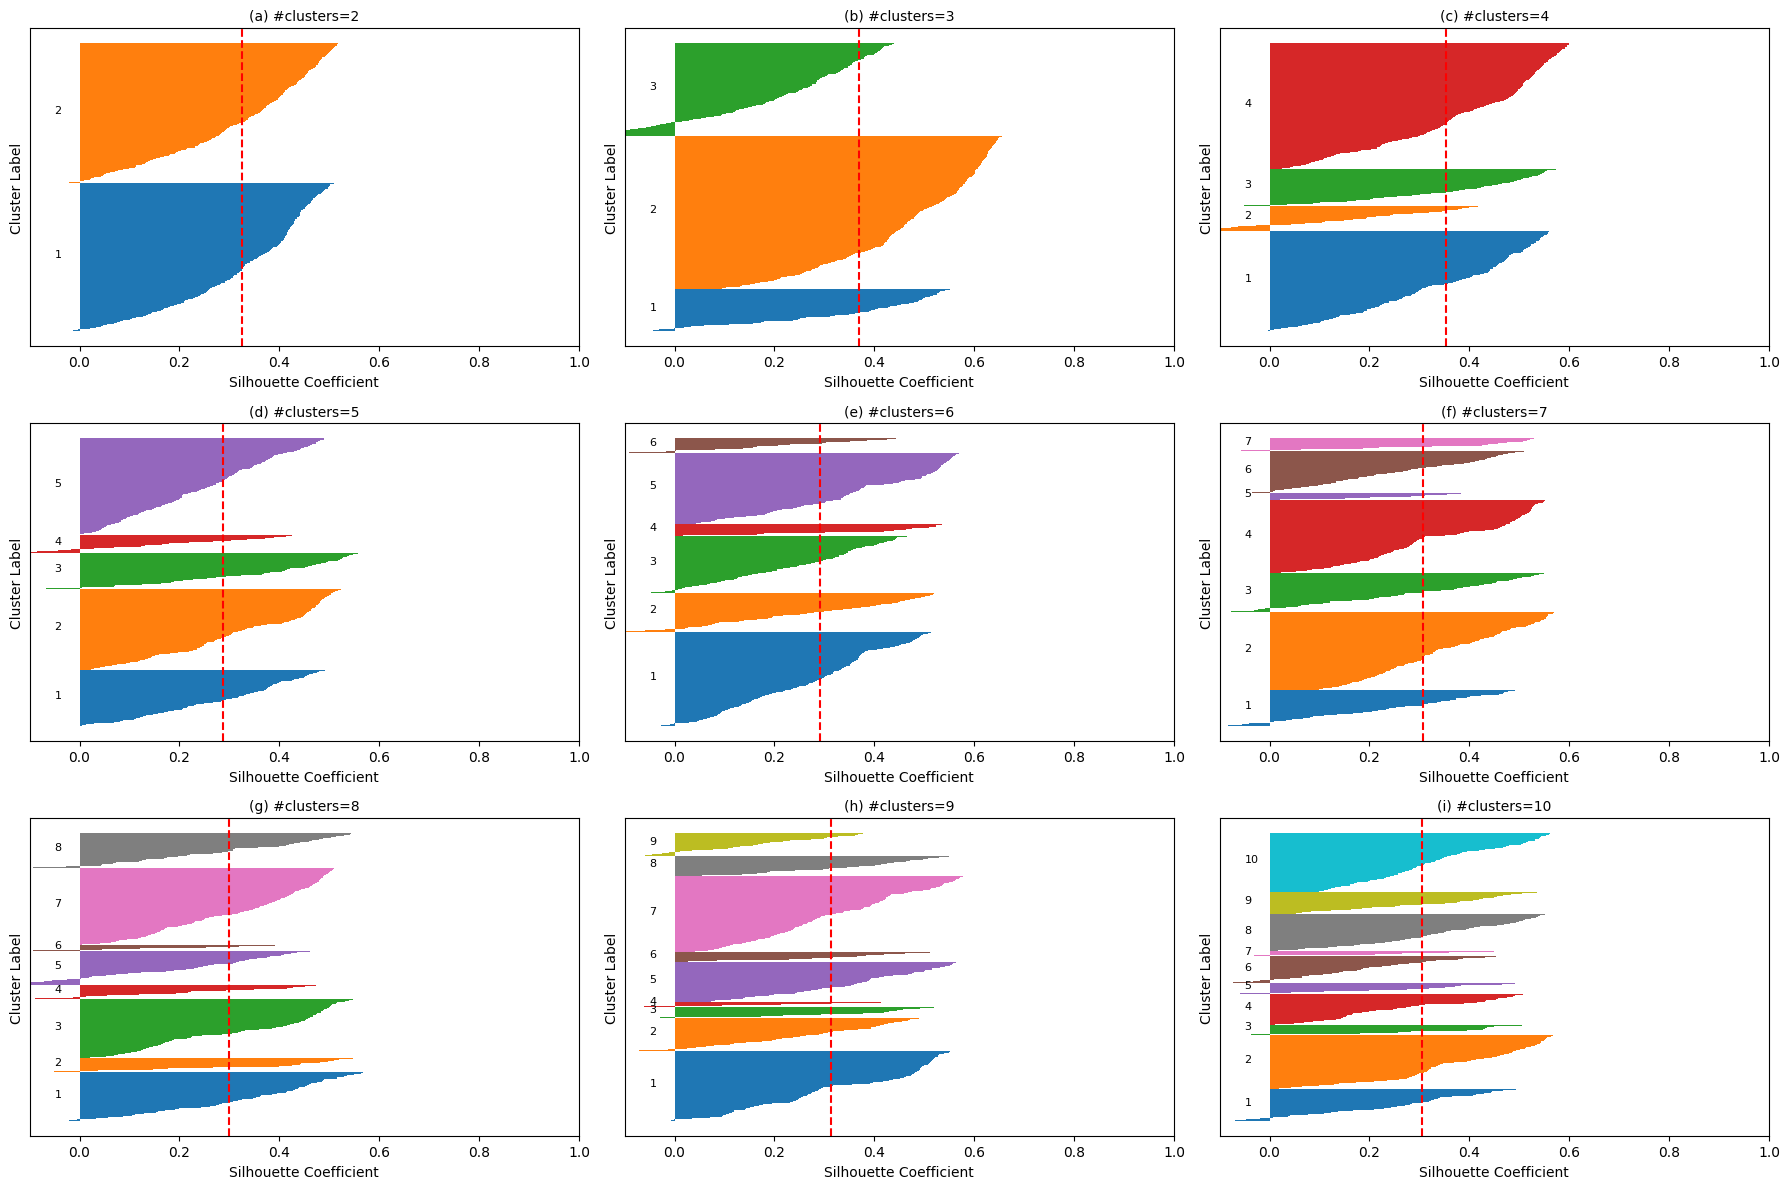


=== Silhouette Score Table ===
| K Value | Average Silhouette Score |
|---------|--------------------------|
| 2       | 0.3250                   |
| 3       | 0.3700                   |
| 4       | 0.3543                   |
| 5       | 0.2866                   |
| 6       | 0.2916                   |
| 7       | 0.3078                   |
| 8       | 0.2999                   |
| 9       | 0.3131                   |
| 10      | 0.3047                   |


In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

def combined_silhouette_and_score_table(df_rfm_new, max_k=10):
    features = ['Recency_Scale', 'Frequency_Scale', 'Monetary_Scale']
    X = df_rfm_new[features].values

    silhouette_scores = []  # 用于存储 k 和平均 Silhouette Score

    fig, axs = plt.subplots(3, 3, figsize=(18, 12))
    axs = axs.flatten()

    for idx, k in enumerate(range(2, max_k + 1)):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        labels = km.fit_predict(X)
        silhouette_vals = silhouette_samples(X, labels)
        avg_score = np.mean(silhouette_vals)
        silhouette_scores.append((k, avg_score))  # 存储 k 和得分

        # 绘制轮廓子图
        ax = axs[idx]
        y_lower = 0
        for i in range(k):
            cluster_vals = silhouette_vals[labels == i]
            cluster_vals.sort()
            y_upper = y_lower + len(cluster_vals)
            ax.barh(range(y_lower, y_upper), cluster_vals, height=1)
            ax.text(-0.05, (y_lower + y_upper)/2, str(i+1), fontsize=8)
            y_lower = y_upper

        ax.axvline(avg_score, linestyle='--', color='red')
        ax.set_xlim([-0.1, 1.0])
        ax.set_title(f'({chr(97+idx)}) #clusters={k}', fontsize=10)
        ax.set_yticks([])
        ax.set_xlabel('Silhouette Coefficient')
        ax.set_ylabel('Cluster Label')

    # 删除多余子图
    for j in range(idx + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

    # 打印表格格式
    print("\n=== Silhouette Score Table ===")
    print("| K Value | Average Silhouette Score |")
    print("|---------|--------------------------|")
    for k, score in silhouette_scores:
        print(f"| {k:<7} | {score:.4f}                   |")

    # 如果你希望生成 DataFrame 可导出
    df_scores = pd.DataFrame(silhouette_scores, columns=["K Value", "Average Silhouette Score"])
    return df_scores
df_table = combined_silhouette_and_score_table(df_rfm_new)


## Delete Outliners and do it again

In [34]:
# import numpy as np
# import pandas as pd

# # Select the RFM normalization column
# rfm_cols = ['Recency_Scale', 'Frequency_Scale', 'Monetary_Scale']
# rfm_scaled = df_rfm_new[rfm_cols]

# # Generate outlier boolean mask: any dimension |z| > 3 is considered an outlier
# outlier_mask = (np.abs(rfm_scaled) > 3).any(axis=1)

# print(f"检测到 {outlier_mask.sum()} 条异常记录，占 {outlier_mask.mean():.2%}")

# # Remove outliers to get a clean data set
# df_clean = df_rfm_new.loc[~outlier_mask].reset_index(drop=True)

# # # Archive outliers separately for subsequent VIP/abnormal repurchase customer analysis
# # outliers = df.loc[outlier_mask]
# # outliers.to_csv("rfm_outliers.csv", index=False)


检测到 39 条异常记录，占 4.92%


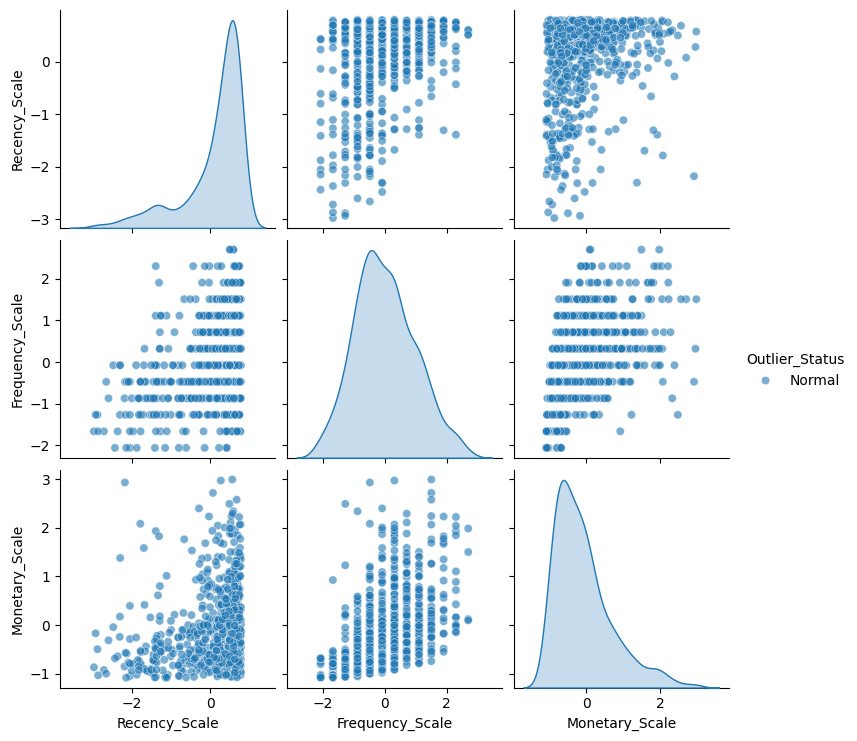

In [35]:
# # Plotting the pairplot using the new column for hue
# sns.pairplot(df_clean, vars=['Recency_Scale','Frequency_Scale','Monetary_Scale'],
#              hue='Outlier_Status',  # Use the new column name as the hue
#              palette={'Normal':'#1f77b4', 'Outlier':'#d62728'}, plot_kws=dict(alpha=.6))


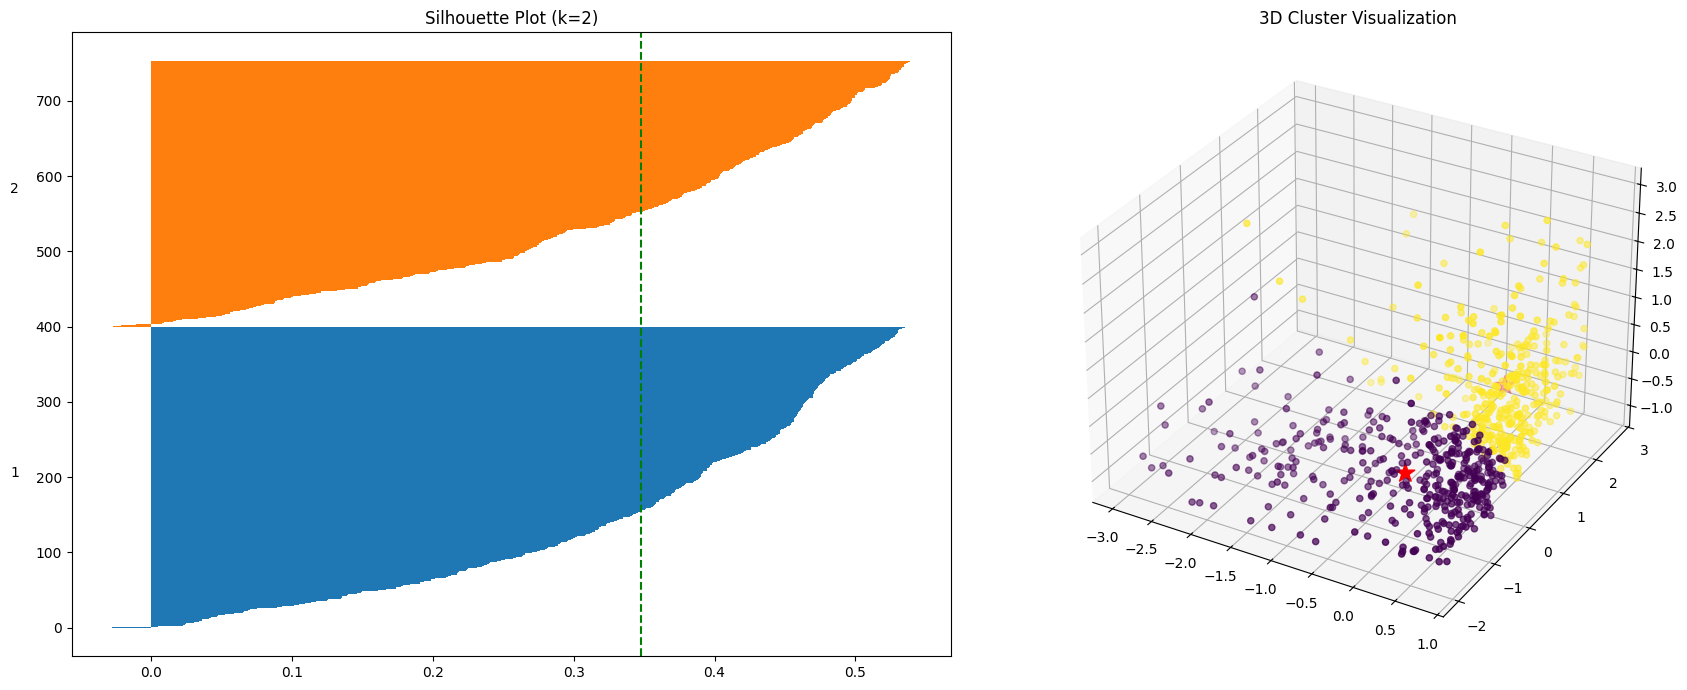


K=2 Result:
Average Silhouette Score: 0.3480


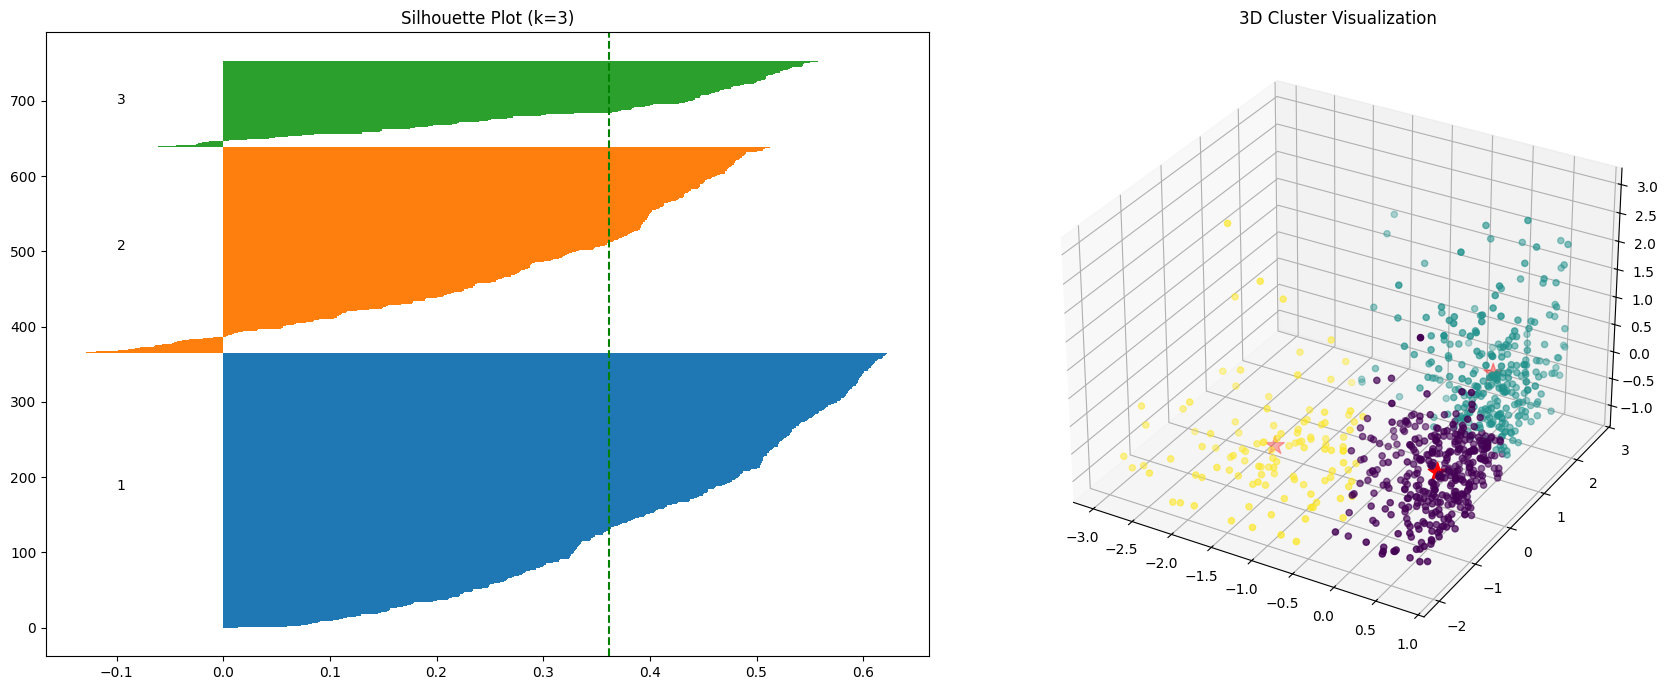


K=3 Result:
Average Silhouette Score: 0.3618


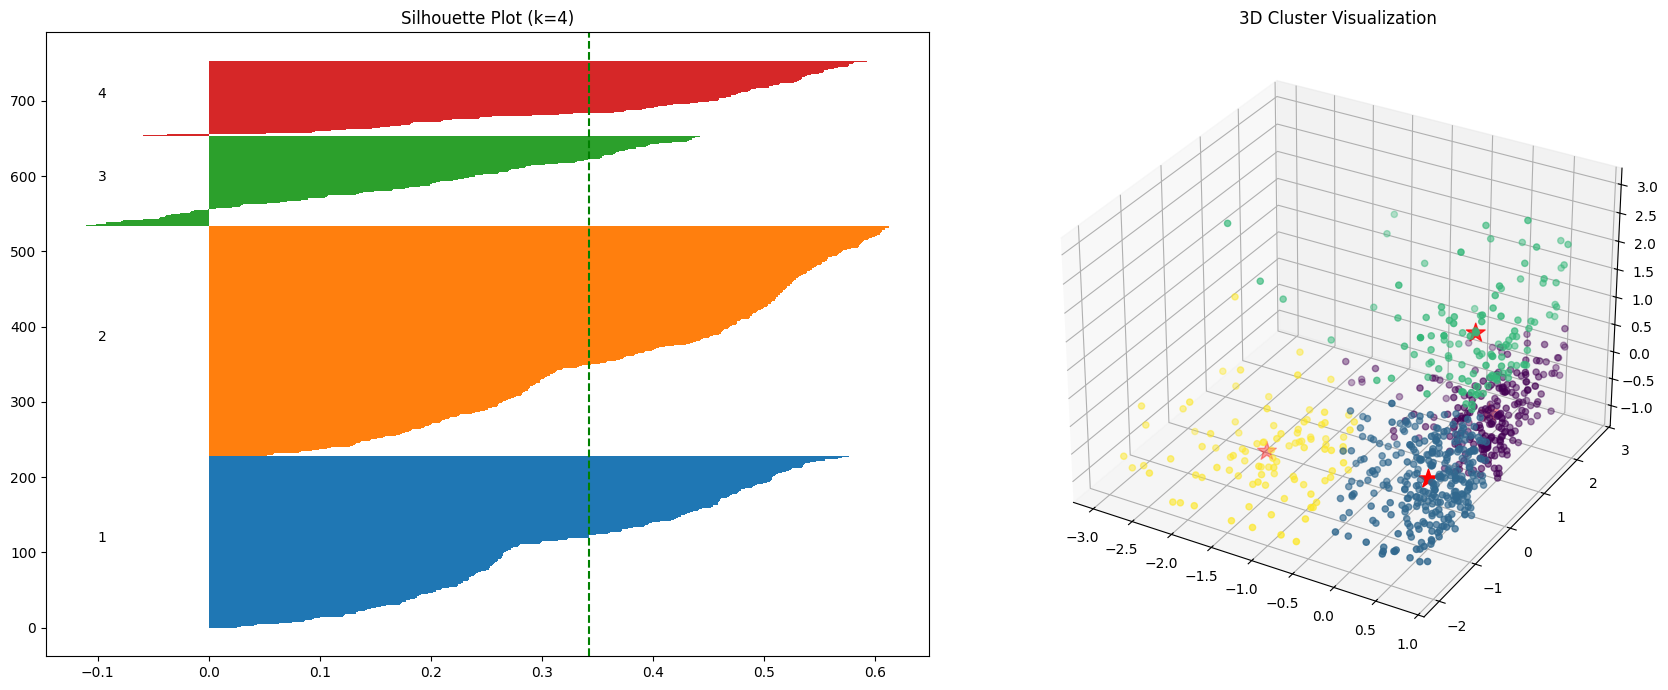


K=4 Result:
Average Silhouette Score: 0.3427


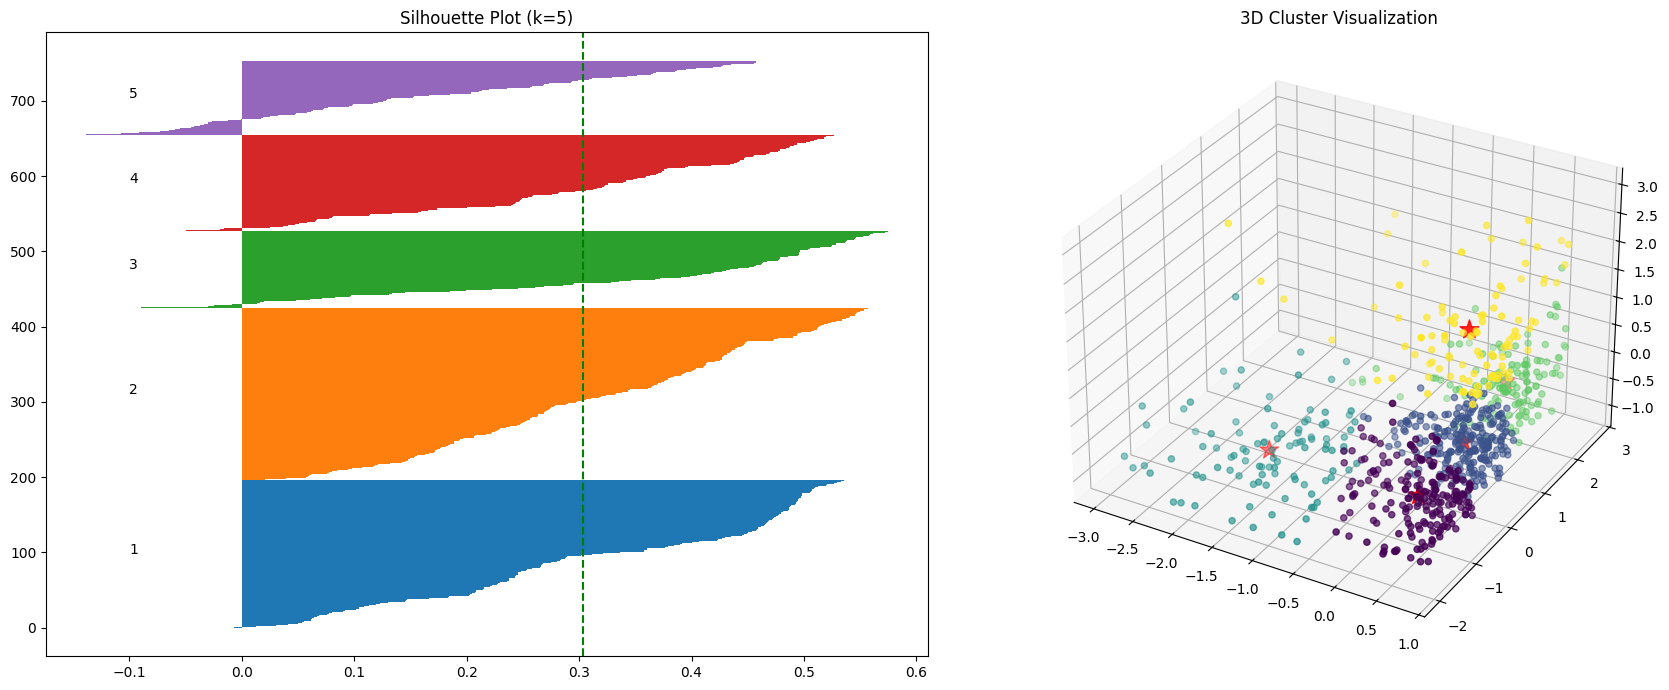


K=5 Result:
Average Silhouette Score: 0.3039


In [36]:
# optimized_silhouette_analysis(df_clean)

Because the average silhouette scores for k=3/4 are lower than original clusters, so we keep the orignal one.

## 3.2. Clustering and regenerate a 'clean' dataset

when k=3, please first mark the cluster that is considered to be "lost or silent customers" based on the results of RFM and
k-means just now,  and then delete it from train.csv to generate a new csv file


In [55]:
# Re-run KMeans with k=3 on the original df_rfm_new to get the cluster labels
km = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
df_rfm_new['Cluster'] = km.fit_predict(df_rfm_new[['Recency_Scale', 'Frequency_Scale', 'Monetary_Scale']])

# Analyze the cluster centroids to identify the "lost or silent customers" cluster
cluster_centroids = df_rfm_new.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print("\nCluster Centroids (Average RFM values):")
print(cluster_centroids)

# The "lost or silent customers" cluster is likely the one with the highest Recency,
# and potentially the lowest Frequency and Monetary values.
# Identify this cluster based on the centroid values. Let's assume it's Cluster 0
# based on typical RFM clustering results where higher Recency means longer time since last purchase.
# **NOTE:** You should visually inspect the `cluster_centroids` output above to confirm
# which cluster corresponds to high Recency/low Frequency/low Monetary.
# Replace `lost_cluster_label = 0` with the actual cluster number from your output.
lost_cluster_label = cluster_centroids['Recency'].idxmax() # Find the cluster with the maximum average Recency

print(f"\nIdentified 'Lost or Silent Customers' Cluster: Cluster {lost_cluster_label}")

# Get the Customer Names belonging to the lost cluster from the df_rfm_new dataframe
lost_customers = df_rfm_new[df_rfm_new['Cluster'] == lost_cluster_label]['Customer Name'].tolist()

print(f"\nNumber of customers in the 'Lost or Silent' cluster: {len(lost_customers)}")
print("Sample of lost customers:", lost_customers[:10]) # Print first 10 as a sample

# Now, delete the rows from the original `superstore` dataframe where the 'Customer Name'
# is in the `lost_customers` list.
initial_rows = superstore.shape[0]
train_cleaned = superstore[~superstore['Customer Name'].isin(lost_customers)].reset_index(drop=True)
rows_after_deletion = train_cleaned.shape[0]

print(f"\nInitial number of rows in original data: {initial_rows}")
print(f"Number of rows after deleting 'Lost or Silent' customers: {rows_after_deletion}")
print(f"Number of rows deleted: {initial_rows - rows_after_deletion}")

# Save the new dataframe to a new CSV file
train_cleaned_filename = 'train_cleaned_after_deleting_lost_customers.csv'
train_cleaned.to_csv(train_cleaned_filename, index=False)

print(f"\nNew cleaned data saved to '{train_cleaned_filename}'")



Cluster Centroids (Average RFM values):
            Recency  Frequency     Monetary
Cluster                                    
0        529.156522   3.721739  1561.401739
1         88.560284   5.297872  1783.693452
2         80.333333   8.811765  5170.760392

Identified 'Lost or Silent Customers' Cluster: Cluster 0

Number of customers in the 'Lost or Silent' cluster: 115
Sample of lost customers: ['Aaron Bergman', 'Andy Gerbode', 'Anemone Ratner', "Anthony O'Donnell", 'Art Foster', 'Benjamin Venier', 'Beth Thompson', 'Bill Shonely', 'Bobby Trafton', 'Brad Eason']

Initial number of rows in original data: 9789
Number of rows after deleting 'Lost or Silent' customers: 8947
Number of rows deleted: 842

New cleaned data saved to 'train_cleaned_after_deleting_lost_customers.csv'
